In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objs as go

In [2]:
%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [4]:
# For Notebooks
init_notebook_mode(connected=True)

In [5]:
# For offline use
cf.go_offline()

In [6]:
df= pd.read_csv('train.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Engineering

### Cabin Class

In [9]:
# df['Cabin'].unique()

In [10]:
df['Cabin'] = df['Cabin'].fillna('None')

In [11]:
df['CabinClass'] = df['Cabin'].apply(lambda x:x[0])

In [12]:
df['CabinClass'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Family Members

In [13]:
df['FamilyMembers'] = df['SibSp']+df['Parch']

In [15]:
df['FamilyMembers'].nunique()

9

### Title in Name

In [16]:
df['Name'].apply(lambda x:((x.split('.')[0]).split(',')[1]).strip()).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [17]:
df['Title'] = df['Name'].apply(lambda x:((x.split('.')[0]).split(',')[1]).strip())

In [454]:
df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

### Ticket Count

In [457]:
df['Ticket'].nunique()

681

In [486]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [471]:
# df['Ticket']

In [582]:
new = df.groupby('Ticket').count()['Name']

In [583]:
new.loc['111369']

1

In [584]:
new.loc['110152']

3

In [585]:
def change(x):
        return new.loc[str(x)]

In [586]:
change(110152)

3

In [587]:
df['TicketCount'] = df['Ticket'].apply(lambda x: change(x))

In [501]:
# df['TicketCount']

### Second Name

In [508]:
df['SecondName']= df['Name'].apply(lambda x:x.split(',')[0])

In [590]:
df.groupby('SecondName').count()['Survived'].sort_values()

SecondName
Abbing       1
Moutal       1
Mudd         1
Mullens      1
Murdlin      1
            ..
Panula       6
Johnson      6
Skoog        6
Sage         7
Andersson    9
Name: Survived, Length: 667, dtype: int64

In [515]:
df.groupby('SecondName').sum()['Survived']

SecondName
Abbing           0
Abbott           1
Abelson          1
Adahl            0
Adams            0
                ..
de Mulder        1
de Pelsmaeker    0
del Carlo        0
van Billiard     0
van Melkebeke    0
Name: Survived, Length: 667, dtype: int64

In [523]:
second = df.groupby('SecondName').sum()['Survived']/df.groupby('SecondName').count()['Survived']

In [524]:
# df['GroupSurvival']

In [525]:
second

SecondName
Abbing           0.0
Abbott           0.5
Abelson          0.5
Adahl            0.0
Adams            0.0
                ... 
de Mulder        1.0
de Pelsmaeker    0.0
del Carlo        0.0
van Billiard     0.0
van Melkebeke    0.0
Name: Survived, Length: 667, dtype: float64

In [528]:
def change(x):
        return second.loc[str(x)]

In [530]:
change('de Mulder')

1.0

In [532]:
df['SecondName']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: SecondName, Length: 891, dtype: object

In [531]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'CabinClass',
       'FamilyMembers', 'Title', 'TicketCount', 'SecondName', 'GroupSurvival'],
      dtype='object')

In [533]:
df['GroupSurvival'] = df['SecondName'].apply(lambda x: change(x))

In [581]:
df['GroupSurvival'].value_counts()

0.000000    470
1.000000    259
0.500000     72
0.666667     36
0.333333     21
0.750000     16
0.222222      9
0.250000      8
Name: GroupSurvival, dtype: int64

## Pclass

In [6]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [9]:
len(df[(df['Pclass']==1) & (df['Survived']==1)])

136

In [25]:
counts = []
label = []
for n in [1,2,3]:
    for m in [0,1]:
        count = len(df[(df['Pclass']==n) & (df['Survived']==m)])
        counts.append(count)
        if m == 1:
            label.append(f"Class: {n} Survived")
        else:
            label.append(f"Class: {n} Not Survived")

In [26]:
counts

[80, 136, 97, 87, 372, 119]

In [27]:
label

['Class: 1 Not Survived',
 'Class: 1 Survived',
 'Class: 2 Not Survived',
 'Class: 2 Survived',
 'Class: 3 Not Survived',
 'Class: 3 Survived']

C:\Users\harik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


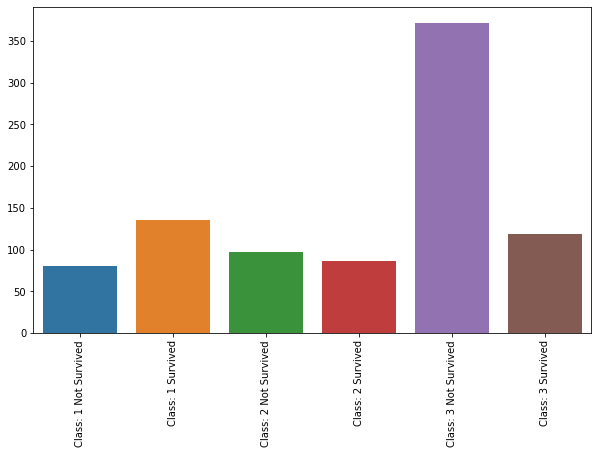

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(label, counts)
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='Pclass', ylabel='count'>

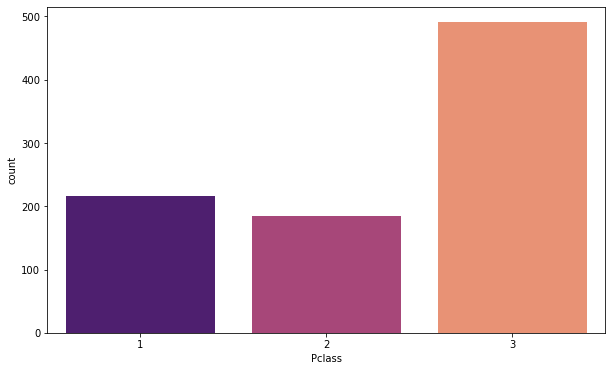

In [52]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Pclass', palette='magma')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

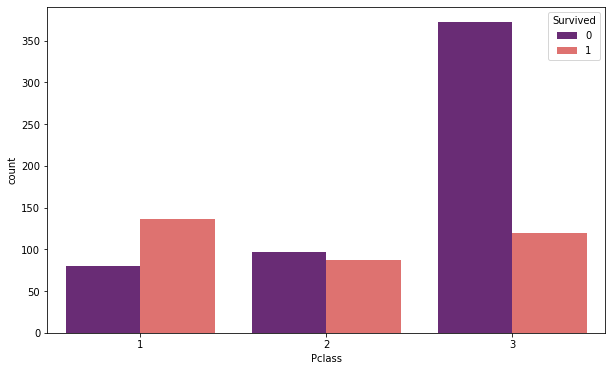

In [105]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Pclass', hue = 'Survived', palette='magma')

In [97]:
df.groupby('Pclass').sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [184]:
nums=df.groupby('Pclass').count()['Sex']

In [185]:
nums

Pclass
1    216
2    184
3    491
Name: Sex, dtype: int64

In [186]:
count = df.groupby('Pclass').sum()['Survived']

In [187]:
count

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [112]:
# percent = []
# for n in nums:
#     for c in count:
#         percent.append(c*100/n)

In [188]:
count*100/nums

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64

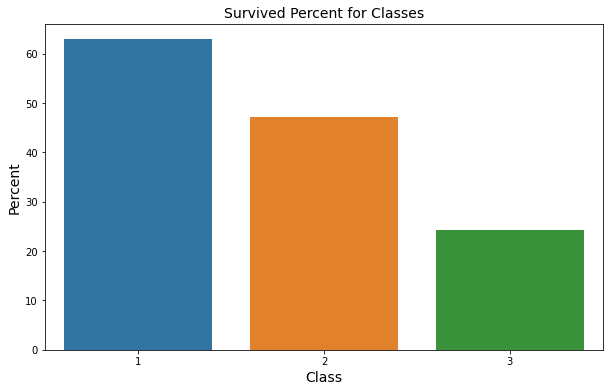

In [189]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=[1,2,3], y= count*100/nums)
plt.xlabel('Class', fontsize = 14)
plt.ylabel('Percent', fontsize = 14)
plt.title('Survived Percent for Classes', fontsize = 14);

Higher class has greater probability for survival

## Sex

In [108]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

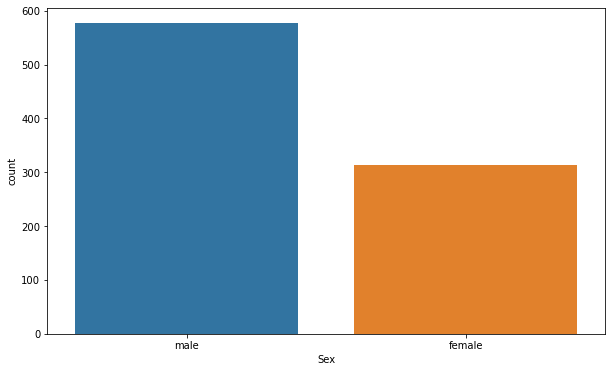

In [110]:
fig = plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

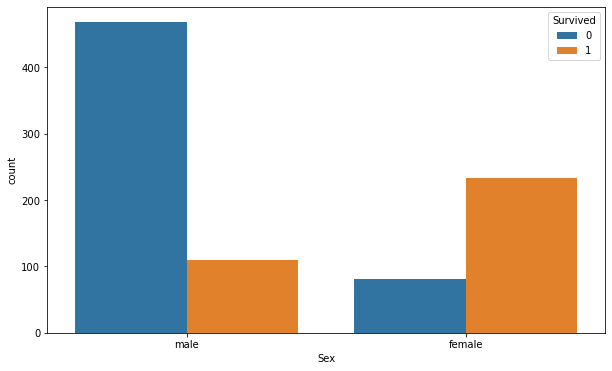

In [111]:
fig = plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Sex', hue = 'Survived')

In [117]:
count = df.groupby('Sex').sum()['Survived'].sort_values()

In [118]:
nums = df['Sex'].value_counts()

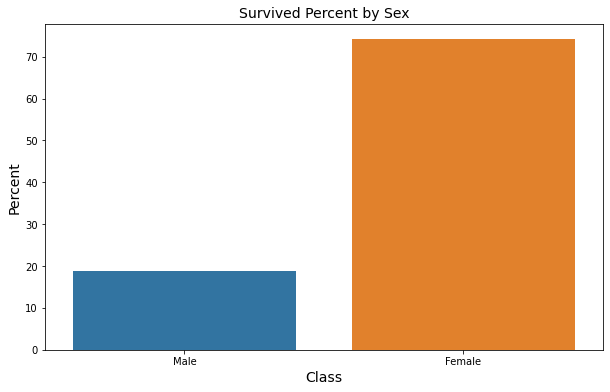

In [123]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=['Male','Female'], y= count*100/nums)
plt.xlabel('Class', fontsize = 14)
plt.ylabel('Percent', fontsize = 14)
plt.title('Survived Percent by Sex', fontsize = 14);

Being feamle increases chance of survival.

## Age

In [237]:
df['Age'].max()

80.0

<AxesSubplot:xlabel='Age', ylabel='Count'>

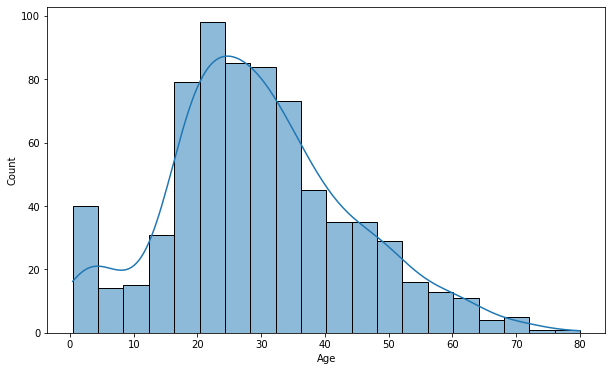

In [133]:
fig = plt.figure(figsize = (10,6))
sns.histplot(data = df, x='Age', bins = 20, kde = True)

<AxesSubplot:xlabel='Age'>

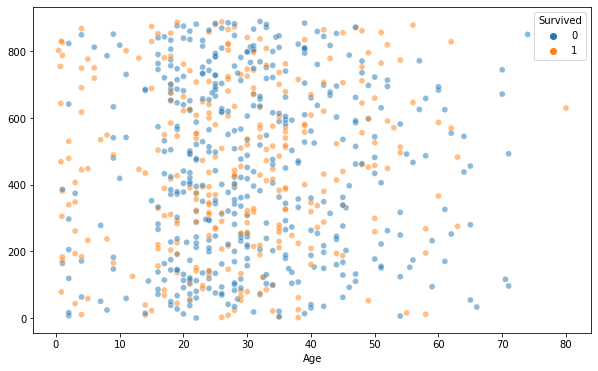

In [142]:
fig = plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x='Age', y = np.arange(len(df)), hue = 'Survived', alpha = .5)

<AxesSubplot:xlabel='Age', ylabel='Count'>

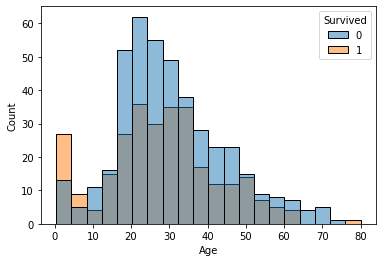

In [146]:
sns.histplot(data =df, x= 'Age', hue = 'Survived')

<AxesSubplot:xlabel='Age', ylabel='Density'>

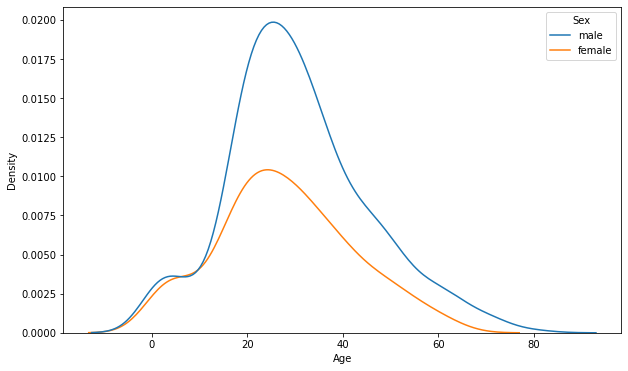

In [148]:
fig = plt.figure(figsize = (10,6))
sns.kdeplot(data = df, x='Age', hue = 'Sex')

<AxesSubplot:xlabel='Age', ylabel='Density'>

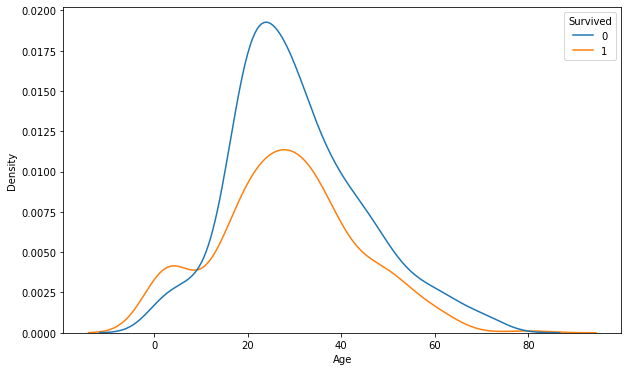

In [149]:
fig = plt.figure(figsize = (10,6))
sns.kdeplot(data = df, x='Age', hue = 'Survived')

In [261]:
age_range = [0,3,5,10,20,30,40,50,60,70,81]
percent = []
age_ = []
for n in range(10):
    age_.append(f"{age_range[n]} to {age_range[n+1]}")
    percent.append(df[(df['Age']<age_range[n+1]) & (df['Age']>age_range[n])]['Survived'].sum()*100/len(df[(df['Age']<age_range[n+1]) & (df['Age']>age_range[n])]))

In [262]:
# percent

In [263]:
# age_

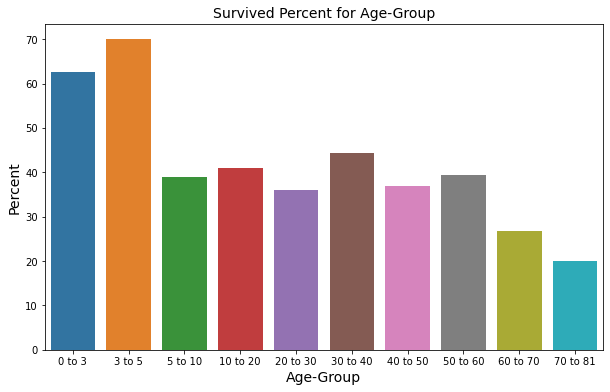

In [264]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=age_, y=percent)
plt.xlabel('Age-Group', fontsize = 14)
plt.ylabel('Percent', fontsize = 14)
plt.title('Survived Percent for Age-Group', fontsize = 14);

In [265]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [286]:
age_range = [0,3,5,10,20,30,40,50,60,70,81]
sex = ['female', 'male']
percent = []
age_ = []
for s in sex:
    for n in range(10):
        age_.append(f"{age_range[n]} to {age_range[n+1]} & {s}")
        percent.append(df[(df['Age']<age_range[n+1]) & (df['Age']>age_range[n])& (df['Sex']==s)]['Survived'].sum()*100/len(df[(df['Age']<age_range[n+1]) & (df['Age']>age_range[n])& (df['Sex']==s)]))

<ipython-input-286-73d26400d3fb>:8: RuntimeWarning:

invalid value encountered in longlong_scalars



In [291]:
# percent

In [292]:
# age_

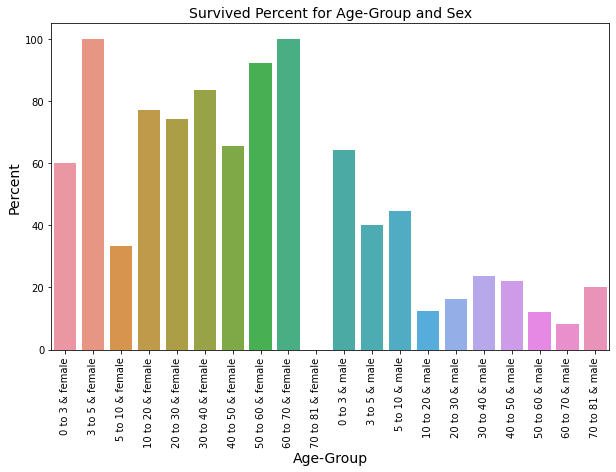

In [290]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=age_, y=percent)
plt.xlabel('Age-Group', fontsize = 14)
plt.ylabel('Percent', fontsize = 14)
plt.title('Survived Percent for Age-Group and Sex', fontsize = 14);
plt.xticks(rotation = 90);

Being female has greater chance of survival for almost all age catogery then male.

Children have greater chance of survival.

## SubSp and Parch

In [298]:
df.groupby('SibSp').count()['Survived']

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

In [314]:
# fig = plt.figure(figsize = (10,6))
# sns.barplot(x=SibSp.index, y=SibSp.values)
# plt.xlabel('Number of Sibling or Spouce', fontsize = 14)
# plt.ylabel('Number', fontsize = 14)
# plt.title('Survived Number for SibSp Numbers', fontsize = 14);

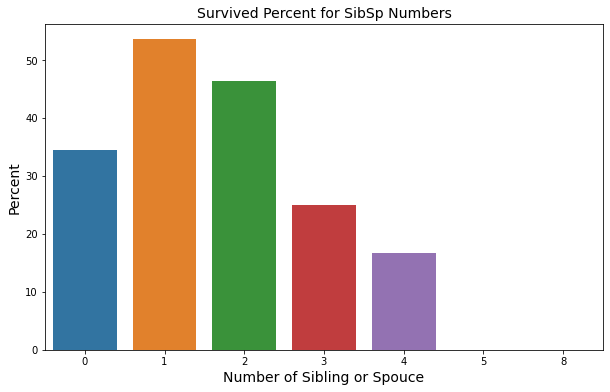

In [311]:
percent = 100*df.groupby('SibSp').sum()['Survived']/df.groupby('SibSp').count()['Survived']
fig = plt.figure(figsize = (10,6))
sns.barplot(x=percent.index, y=percent.values)
plt.xlabel('Number of Sibling or Spouce', fontsize = 14)
plt.ylabel('Percent', fontsize = 14)
plt.title('Survived Percent for SibSp Numbers', fontsize = 14);


In [312]:
df.groupby('Parch').count()['Survived']

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

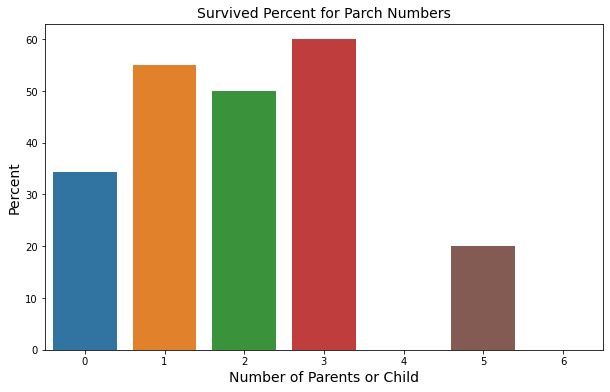

In [313]:
percent = 100*df.groupby('Parch').sum()['Survived']/df.groupby('Parch').count()['Survived']
fig = plt.figure(figsize = (10,6))
sns.barplot(x=percent.index, y=percent.values)
plt.xlabel('Number of Parents or Child', fontsize = 14)
plt.ylabel('Percent', fontsize = 14)
plt.title('Survived Percent for Parch Numbers', fontsize = 14);

Greater number of SibSp or Parch results in reduction of survival chance.
<br>
SibSp = 1 has greatest chance of survival
<br>
Parch = 3 has greatest chance of survival.
<br>


### FamilyMembers

In [426]:
family =df.groupby('FamilyMembers').sum()['Survived']
trace = go.Bar(x=family.index, y=family.values)
layout = {
    'title_text': 'Family Members and Number of Survivals',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

In [425]:
percent = df.groupby('FamilyMembers').sum()['Survived']*100/df.groupby('FamilyMembers').count()['Survived']
trace = go.Bar(x=percent.index, y=percent.values)
layout = {
    'title_text': 'Family Members and Percent of Survivals',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

In [429]:
numbers =df.groupby('FamilyMembers').count()['Survived']
trace = go.Bar(x=numbers.index, y=numbers.values)
layout = {
    'title_text': 'Family Members and Number of Passengers',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

Family containg three members is most likely to survive.
<br>
Family containg greater then three members is less likely to survive.
<br>
People with lesser family numbers are more likely to survive.

### Cabin Class

In [431]:
cabin =df.groupby('CabinClass').sum()['Survived']
trace = go.Bar(x=cabin.index, y=cabin.values)
layout = {
    'title_text': 'Cabin Class and Number of Survivals',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

In [432]:
percent = df.groupby('CabinClass').sum()['Survived']*100/df.groupby('CabinClass').count()['Survived']
trace = go.Bar(x=percent.index, y=percent.values)
layout = {
    'title_text': 'Cabin Class and Percent of Survivals',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

In [409]:
family =df.groupby('FamilyMembers').sum()['Survived']

In [433]:
numbers =df.groupby('CabinClass').count()['Survived']
trace = go.Bar(x=numbers.index, y=numbers.values)
layout = {
    'title_text': 'Cabin Class and Number of Passengers',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

For None cabin, survival chances are lesser.
<br>
In general, passenger with a cabin is more likely to survive.

In [423]:
# percent

In [424]:
# df.groupby('FamilyMembers').sum()['Survived']

## Fare

(0.0, 100.0)

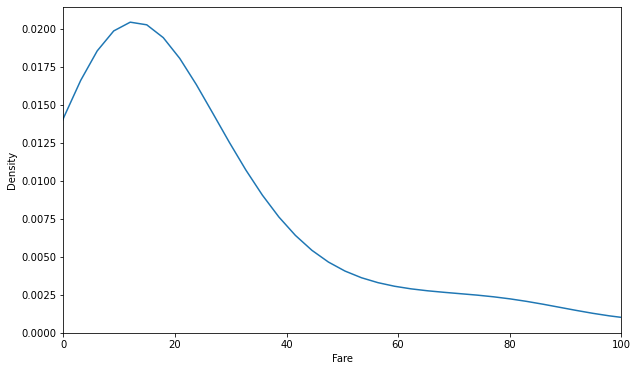

In [326]:
fig = plt.figure(figsize = (10,6))
sns.kdeplot(data = df, x = 'Fare')
plt.xlim((0,100))

In [353]:
# trace = go.Scatter3d(
#    y = df['Fare'], x = df['PassengerId'], z= df['Pclass'] ,mode = 'markers', marker = dict(
#       size = 12,
#       color = df['Survived'], # set color to an array/list of desired values
#       colorscale = 'Viridis'
#       )
#    )
# fig = go.Figure(data = [trace], layout = layout)
# iplot(fig)

In [352]:
trace = go.Scatter(
   y = df['Fare'], x = df['PassengerId'] ,mode = 'markers',
    marker = dict(
      size = 12,
      color = df['Survived'], # set color to an array/list of desired values
      colorscale = 'Viridis'
      )
   )
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [384]:
# df[df['Fare'] > 200].sort_values('Fare')

In [380]:
fare_range = [0,3,5,10,15,20,25,30,35,50, 80,100,200,280, 600]
# sex = ['female', 'male']
percent = []
fare = []
count = []
count_all = []
# for s in sex:
for n in range(14):
    fare.append(f"{fare_range[n]} to {fare_range[n+1]}")
    count.append(df[(df['Fare']<fare_range[n+1]) & (df['Fare']>fare_range[n])]['Survived'].sum())
    count_all.append(len(df[(df['Fare']<fare_range[n+1]) & (df['Fare']>fare_range[n])]))
    percent.append(df[(df['Fare']<fare_range[n+1]) & (df['Fare']>fare_range[n])]['Survived'].sum()*100/len(df[(df['Fare']<fare_range[n+1]) & (df['Fare']>fare_range[n])]))

<ipython-input-380-a059a39e7874>:12: RuntimeWarning:

invalid value encountered in longlong_scalars



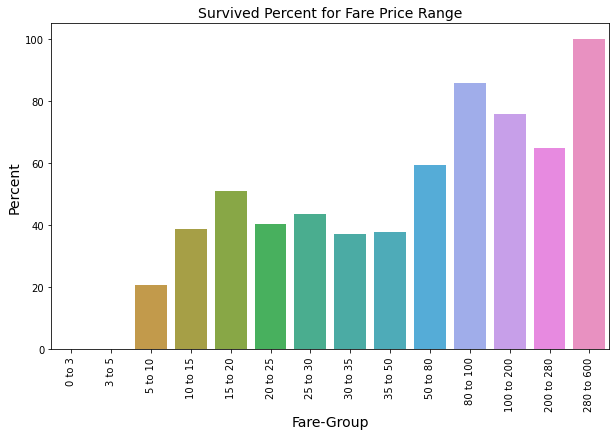

In [376]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=fare, y=percent)
plt.xlabel('Fare-Group', fontsize = 14)
plt.ylabel('Percent', fontsize = 14)
plt.title('Survived Percent for Fare Price Range', fontsize = 14);
plt.xticks(rotation = 90);

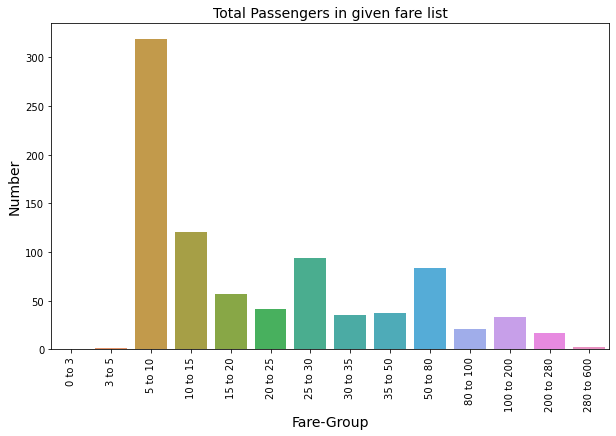

In [383]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=fare, y=count_all)
plt.xlabel('Fare-Group', fontsize = 14)
plt.ylabel('Number', fontsize = 14)
plt.title('Total Passengers in given fare list', fontsize = 14);
plt.xticks(rotation = 90);

In [395]:
trace = go.Bar(x=fare, y=percent)
layout = {
    'title_text': 'Count',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

Increase in Fare results in increase in survival chance.

### Ticket Count

In [494]:
percent = df.groupby('TicketCount').sum()['Survived']*100/df.groupby('TicketCount').count()['Survived']
trace = go.Bar(x=percent.index, y=percent.values)
layout = {
    'title_text': 'Ticket Count and Percent of Survivals',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

In [495]:
numbers =df.groupby('TicketCount').count()['Survived']
trace = go.Bar(x=numbers.index, y=numbers.values)
layout = {
    'title_text': 'Ticket Count and Number of Passengers',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

In [498]:
numbers =df.groupby('TicketCount').sum()['Survived']
trace = go.Bar(x=numbers.index, y=numbers.values)
layout = {
    'title_text': 'Ticket Count and Number of Passengers Survived',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

Ticket count of three is most likely to survive.
<br>
Alone passengers are less likely to survive.

### Title

In [499]:
percent = df.groupby('Title').sum()['Survived']*100/df.groupby('Title').count()['Survived']
trace = go.Bar(x=percent.index, y=percent.values)
layout = {
    'title_text': 'Title and Percent of Survivals',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

In [500]:
numbers =df.groupby('Title').count()['Survived']
trace = go.Bar(x=numbers.index, y=numbers.values)
layout = {
    'title_text': 'Title and Number of Passengers',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

There is not very distinct difference in survival chance and the title used.
<br>
However, persons with title Mr. are lees likely to survive.
<br>
Honorary titles, eg. Dr. rev, Sir are, in general more likely to survive.

### Group Survival

In [570]:
groups = df['GroupSurvival'].value_counts().sort_values(ascending = False)*100/891

In [596]:
# df['SecondName']

In [597]:
# groups

In [574]:

trace = go.Bar(x=groups.index, y=groups.values)
layout = {
    'title_text': 'Group Survival of Families and Percent of Total Families',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

It is more likely to either survive as a whole family or not survive at all.

In [592]:
# df

### Embarked

In [593]:
percent = df.groupby('Embarked').sum()['Survived']*100/df.groupby('Embarked').count()['Survived']
trace = go.Bar(x=percent.index, y=percent.values)
layout = {
    'title_text': 'Embark and Percent of Survivals',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

In [594]:
numbers =df.groupby('Embarked').count()['Survived']
trace = go.Bar(x=numbers.index, y=numbers.values)
layout = {
    'title_text': 'Embark and Number of Passengers',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

In [595]:
numbers =df.groupby('Embarked').sum()['Survived']
trace = go.Bar(x=numbers.index, y=numbers.values)
layout = {
    'title_text': 'Embark and Number of Survivers',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

In [619]:
g2 =df.groupby(['Embarked', 'Sex']).sum()['Survived']

In [612]:
g1 = df.groupby(['Embarked', 'Sex']).count()['Survived']

In [618]:
g1

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: Survived, dtype: int64

In [617]:
g1[('C', 'female')]

73

In [622]:
embark = ['C', 'Q', 'S']
sex = ['male', 'female']
x = []
y = []
for e in embark:
    for s in sex:
        y.append(g2[(e,s)]*100/g1[(e,s)])
        x.append(f"Embarked: {e} and {s}")

In [623]:
y

[30.526315789473685,
 87.67123287671232,
 7.317073170731708,
 75.0,
 17.46031746031746,
 68.96551724137932]

In [624]:
x

['Embarked: C and male',
 'Embarked: C and female',
 'Embarked: Q and male',
 'Embarked: Q and female',
 'Embarked: S and male',
 'Embarked: S and female']

In [626]:

trace = go.Bar(x=x, y=y)
layout = {
    'title_text': 'Embark and Percent of Survivers',

}
fig = go.Figure(data = [trace], layout=layout)
iplot(fig)

Female are most likely to survive when embarked from C.
<br>
In general, female are more likely to survive as male with any point of embark.

In [628]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,FamilyMembers,Title,TicketCount,SecondName,GroupSurvival
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,N,1,Mr,1,Braund,0.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1,Mrs,1,Cumings,1.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,N,0,Miss,1,Heikkinen,1.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1,Mrs,2,Futrelle,0.500000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,N,0,Mr,1,Allen,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S,N,0,Rev,1,Montvila,0.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,0,Miss,1,Graham,0.666667
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,None,S,N,3,Miss,2,Johnston,0.000000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,0,Mr,1,Behr,1.000000
